### Step 1: Data Loading and Preprocessing

- Load the Fashin MNIST dataset, normalize the images, and split it into training and validation sets.

In [57]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Print the shape of the data for confirmation
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


### Step2: Model Definition
Define a basic Fully connected feedforward Neural Network model.This initial architecture will include:
- A flattened input layer to transform the 28x28 images into a 784-element vector.
- Two hidden layers with ReLU activation.
- An output layer with softmax activation for classification.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flattening 28x28 images to a vector of size 784
    Dense(128, activation='relu'),           # First hidden layer with 128 neurons
    Dense(64, activation='relu'),            # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')          # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\berk.hadzhamolla\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Step3: Model Training and Valudation
Training the model for specified number of epochs and validate it against the test set. This will allow us to monitor both training and validation accuracy and loss.

In [ ]:
history = model.fit(
    train_images, train_labels, 
    epochs=15, 
    validation_data=(test_images, test_labels)
)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7856 - loss: 0.6107 - val_accuracy: 0.8470 - val_loss: 0.4307
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8634 - loss: 0.3733 - val_accuracy: 0.8473 - val_loss: 0.4153
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8769 - loss: 0.3356 - val_accuracy: 0.8637 - val_loss: 0.3683
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3111 - val_accuracy: 0.8651 - val_loss: 0.3669
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8909 - loss: 0.2928 - val_accuracy: 0.8758 - val_loss: 0.3464
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2815 - val_accuracy: 0.8732 - val_loss: 0.3573
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8980 - loss: 0.2674 - val_accuracy: 0.8811 - val_loss: 0.3364
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9063 - loss: 0.2500 - 

### Step 4: Plotting Training and Validation Metrics

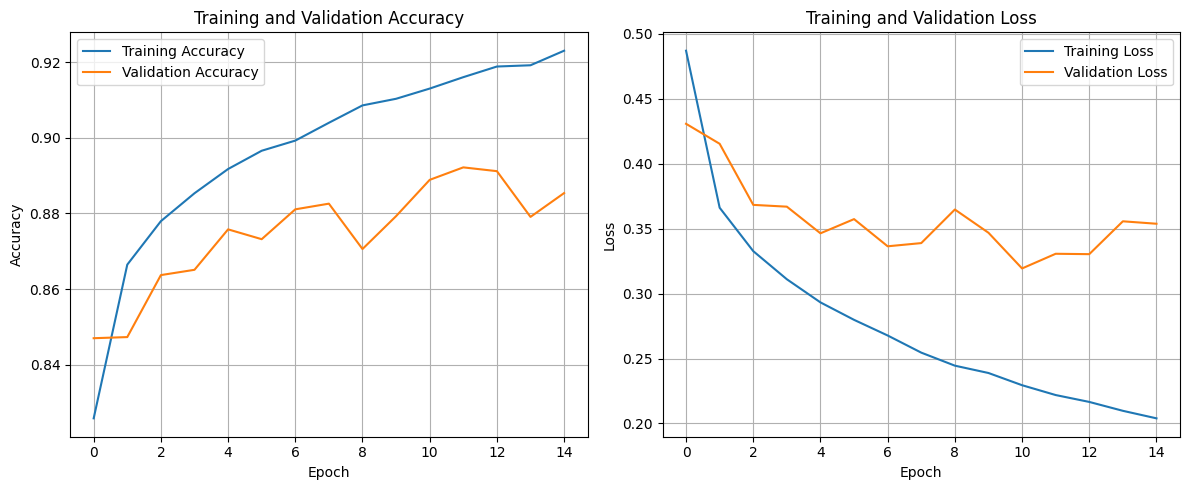

In [72]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()


### Training and Validation Metrics

#### Training and Validation Accuracy

- **Training Accuracy**: The training accuracy increases consistently with each epoch, reaching above **91%**, indicating that the model is effectively learning from the training data.
- **Validation Accuracy**: The validation accuracy improves initially and stabilizes around **88%**. This slight gap between training and validation accuracy suggests some overfitting, as the model performs slightly better on the training data than on the validation data.

#### Training and Validation Loss

- **Training Loss**: The training loss decreases steadily, showing that the model is effectively minimizing error on the training data.
- **Validation Loss**: The validation loss fluctuates more, potentially indicating some difficulty in generalizing to the validation set, again hinting at slight overfitting.


### Step 5: Confusion Matrix Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


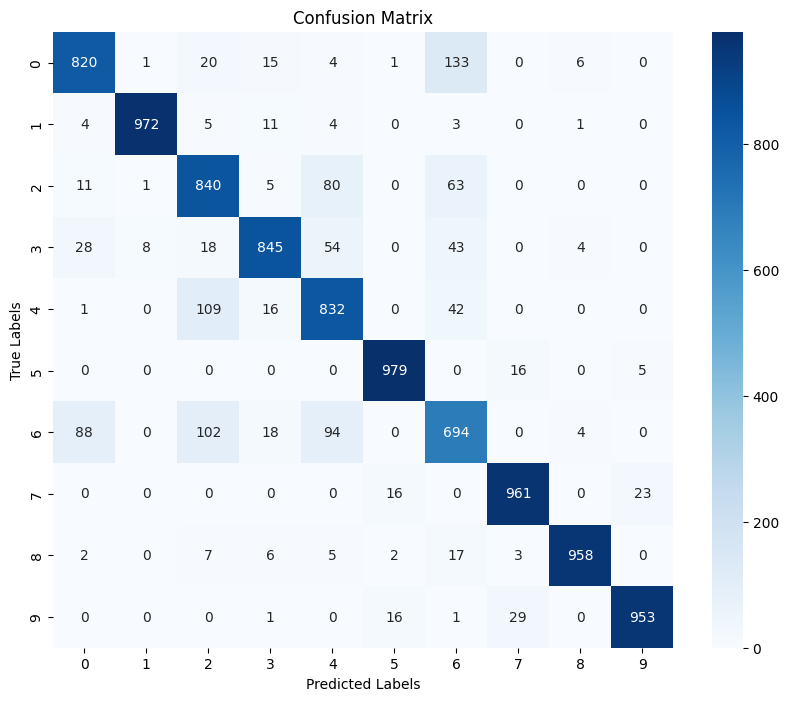

In [61]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(10)], 
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Confusion Matrix

The confusion matrix provides detailed insights into where the model is performing well and where it struggles:

- **High Accuracy Classes**: 
  - Classes **1, 3, 5,** and **9** (index 1 for T-shirt/top, 3 for Dress, 5 for Sandal, and 9 for Ankle boot) show high accuracy with very few misclassifications. This suggests that the model finds these classes relatively easier to distinguish.
  
- **Noticeable Misclassifications**: 
  - **Class 6 (Shirt)** has significant misclassifications as **Class 0 (T-shirt/top)** and **Class 4 (Coat)**.
  - **Class 4 (Coat)** is sometimes misclassified as **Class 2 (Pullover)**.

These misclassifications may be due to similarities in appearance among these types of clothing, making it challenging for the model to differentiate them.


# Observations from Initial Model Performance

- Overfitting was observed in the initial model as training accuracy increased while validation accuracy plateaued.
- Confusion matrix analysis showed misclassifications between classes
- To address these issues, the model will be updated to include dropout layers, and early stopping will be added and also CNN architecture is goint to be used


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with some augmentations
datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,    # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,   # Randomly shift images vertically by up to 10%
    shear_range=0.1,          # Shear angle in counter-clockwise direction
    zoom_range=0.1,           # Randomly zoom in on images
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels after transformation
)


datagen.fit(train_images)


In [ ]:
# Define a new CNN model with dropout layers to reduce overfitting
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense

cnn_model_v2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Adding dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adding dropout
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Adding dropout
    Dense(10, activation='softmax')
])

# Compile the updated model
cnn_model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Adding Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train and validate the updated model with early stopping
history_cnn_v2 = cnn_model_v2.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    epochs=30,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 94ms/step - accuracy: 0.5473 - loss: 1.2314 - val_accuracy: 0.7650 - val_loss: 0.6083
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.7461 - loss: 0.6719 - val_accuracy: 0.8180 - val_loss: 0.4823
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.7786 - loss: 0.5831 - val_accuracy: 0.8226 - val_loss: 0.4693
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.7975 - loss: 0.5428 - val_accuracy: 0.8455 - val_loss: 0.4151
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.8133 - loss: 0.5017 - val_accuracy: 0.8507 - val_loss: 0.4101
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.8194 - loss: 0.4864 - val_accuracy: 0.8623 - val_loss: 0.3609
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.8267 - loss: 0.4588 - val_accuracy: 0.8693 - val_loss: 0.3520
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 129ms/step - accuracy: 0.8392 - loss: 0.

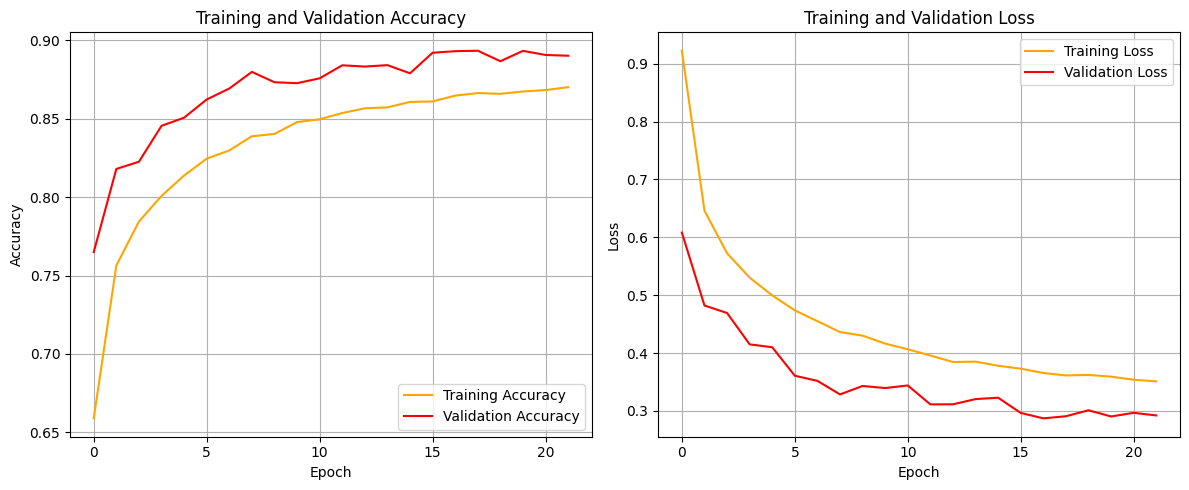

In [82]:
# Plot training & validation accuracy and loss using the History object
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn_v2.history['accuracy'], label='Training Accuracy', color='orange')
plt.plot(history_cnn_v2.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn_v2.history['loss'], label='Training Loss', color='orange')
plt.plot(history_cnn_v2.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Improved Results Analysis and How I Achieved Them

The updated model shows significant improvements in both generalization and stability, as evidenced by the training and validation accuracy and loss curves. Here’s a breakdown of the results and the steps I took to achieve these improvements:

1. **Reduced Overfitting**
   - In the first model, training accuracy increased rapidly, significantly outperforming the validation accuracy, which indicated overfitting. The validation accuracy also fluctuated, showing that the model was not generalizing well to new data.
   - **How I Improved**: 
     - **Dropout Layers** were added after each convolutional and dense layer to randomly deactivate neurons during training. This helps the model become more robust by preventing it from relying too heavily on specific features and forcing it to learn more general patterns.
     - **Early Stopping** was also implemented to stop training once the validation loss stopped improving, reducing the risk of overfitting by preventing unnecessary extra training epochs.

2. **Improved Generalization**
   - The validation accuracy in the updated model is closer to the training accuracy, indicating that the model now generalizes better to unseen data. Previously, the validation accuracy plateaued early and was considerably lower than the training accuracy, which is a clear sign of overfitting.
   - **How I Improved**:
     - By introducing dropout and early stopping, I allowed the model to learn meaningful patterns from the data without over-relying on specific details. This makes the model more adaptable to new data, as seen by the more aligned training and validation accuracy curves.
     - **Data Augmentation**  would further improve generalization by artificially expanding the dataset and helping the model see a variety of transformations, making it more robust to variations in the test data.

3. **Stabilized Loss Curves**
   - In the updated model, both the training and validation loss decrease gradually and smoothly, which indicates that the model has learned most of the relevant features without fitting noise in the data.
   - **How I Improved**:
     - Regularization through dropout layers effectively prevented the model from overfitting, as demonstrated by the steady decline and convergence of the loss curves.
     - Early stopping prevented unnecessary extra training, resulting in a loss curve that reflects meaningful learning rather than fitting irrelevant details in the data.

### Summary

By adding dropout and early stopping, I achieved a more balanced and generalizable model that performs well on both the training and validation sets. Although the training accuracy is slightly lower than in the overfitted model, the validation accuracy is higher and more stable, making the updated model a better choice for real-world applications where generalization to new data is crucial.



### Hyperparameters and Tuning Rationale

1. **Architecture Choice**:
   - **Initial Model**: Fully Connected Neural Network (NN) with two hidden layers. This was chosen as a simple starting point, where each image was flattened into a 1D vector, followed by dense layers to classify the images.
   - **Updated Model**: Convolutional Neural Network (CNN) with multiple `Conv2D` and `MaxPooling2D` layers. CNNs are more suitable for image data as they capture spatial patterns, edges, and textures, allowing for improved feature extraction and classification accuracy.

2. **Number of Layers and Neurons**:
   - **Initial Model**:
     - **Flatten Layer**: Used to transform each 28x28 image into a 784-element vector for input to the dense layers.
     - **Dense Layers**: Two hidden layers with 128 and 64 neurons, respectively, using ReLU activation. This provides a simple structure to model relationships without spatial awareness.
   - **Updated Model**:
     - **Conv2D Layers**: Multiple convolutional layers with an increasing number of filters (32, 64, 128). The higher filter counts allow the model to learn more complex features at each level.
     - **MaxPooling2D Layers**: Applied after each convolutional layer to downsample the spatial dimensions and reduce computational complexity, making the model more efficient.
     - **Dense Layer**: A dense layer with 128 neurons after flattening the CNN features, using ReLU activation to capture the learned high-level patterns before classification.

3. **Activation Functions**:
   - **ReLU Activation**: Used in both the initial and updated models for all hidden layers. ReLU introduces non-linearity, allowing the network to learn more complex patterns, and is computationally efficient.
   - **Softmax Activation**: Applied in the output layer to produce a probability distribution across the 10 classes. This is essential for multi-class classification tasks like Fashion MNIST.

4. **Regularization Techniques**:
   - **Dropout Layers** (updated model only): Added after each convolutional and dense layer in the CNN model to reduce overfitting by randomly deactivating neurons during training. Dropout helps the model generalize better by preventing it from becoming overly reliant on specific features.
   - **Early Stopping** (updated model only): Configured to monitor validation loss and stop training if it no longer improves after a few epochs. This avoids unnecessary training, thus minimizing overfitting and improving generalization.

5. **Optimizer and Loss Function**:
   - **Adam Optimizer**: Used in both models. Adam is adaptive, combining the benefits of momentum and RMSprop, making it well-suited for deep learning tasks where gradients can vary widely. It helps achieve faster convergence with minimal tuning.
   - **Categorical Cross-Entropy Loss**: Applied to compute the error in multi-class classification tasks. It penalizes incorrect predictions based on the log probability of the correct class, which is suitable for softmax output.

6. **Data Augmentation** (updated model only):
   - **ImageDataGenerator**: Used to augment the training data by applying transformations like rotation, width/height shifts, shear, and zoom. Data augmentation artificially expands the dataset and makes the model more robust by exposing it to a variety of transformations, reducing overfitting and enhancing generalization.

7. **Batch Size and Epochs**:
   - **Batch Size**: 128, chosen to balance memory efficiency and training speed.
   - **Epochs**: Initially set to a higher value, with early stopping ensuring that training halts when no further improvement in validation loss is observed, thus optimizing training time and reducing overfitting.

### Summary
These hyperparameters were chosen to balance model complexity, training efficiency, and generalization. The fully connected initial model served as a baseline, while the optimized CNN model with dropout, early stopping, and data augmentation provided improved performance on both training and validation sets by effectively capturing spatial features and avoiding overfitting.
